In [1]:
test_docs_addr = '/kaggle/input/indian-doc-summary-dataset/IN-Abs/test-data/judgement'
test_sums_addr = '/kaggle/input/indian-doc-summary-dataset/IN-Abs/test-data/summary'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import os
test_df = pd.DataFrame()

test_docs = []
test_sums = []
doc_num = []

for doc in os.listdir(test_docs_addr):
    with open(test_docs_addr + '/' + doc, "r") as file:
        test_docs.append(file.read())
        doc_num.append(doc)

for summ in os.listdir(test_sums_addr):
    with open(test_sums_addr + '/' + summ, "r") as file:
        test_sums.append(file.read())

In [4]:
test_df['Doc'] = doc_num
test_df['Text'] = test_docs
test_df['Summary'] = test_sums
test_df.head()

,Doc,Text,Summary
0,1181.txt,Appeal No. 101 of 1959.\nAppeal by special lea...,The appellants who are displaced persons from ...
1,6003.txt,it case for initiating any procee d ings for c...,The petitioners in the writ petitions were app...
2,2593.txt,Appeal No. 647 of 1966.\nAppeal by special lea...,The first respondent while he was holding the ...
3,2657.txt,l Misc.\nPetitions Nos.\n401/and 4012 of 1968....,M/s Tarapore & Co. who were plaintiffs in a su...
4,3542.txt,N: Criminal Appeals Nos.\n39 40 of 1976.\n(Fro...,The appellants wrote a letter to the President...


In [5]:
# Open the file and read lines
with open("/kaggle/input/indian-doc-summary-dataset/IN-Abs/test-data/stats-IN-test.txt", "r") as file:
    lines = file.readlines()

# Extract the second column values
second_column_values = [int(line.split()[1]) for line in lines]

# Extract the second column values
third_column_values = [int(line.split()[2]) for line in lines]

In [6]:
import numpy as np
import statistics as stats
def list_metrics(lst):
    metrics = {
        "min": min(lst),
        "max": max(lst),
        "mean": np.mean(lst),
        "median": np.median(lst),
        "mode": stats.mode(lst),
        "std_dev": np.std(lst),
        "variance": np.var(lst),
        "sum": sum(lst),
        "count": len(lst),
        "range": max(lst) - min(lst),
        "25th_percentile": np.percentile(lst, 25),
        "75th_percentile": np.percentile(lst, 75),
        "iqr": np.percentile(lst, 75) - np.percentile(lst, 25),
    }
    return metrics

In [7]:
list_metrics(second_column_values)

{'min': 512,
 'max': 39753,
 'mean': 4786.04,
 'median': 3174.5,
 'mode': 1326,
 'std_dev': 5423.123953811123,
 'variance': 29410273.418399993,
 'sum': 478604,
 'count': 100,
 'range': 39241,
 '25th_percentile': 2102.5,
 '75th_percentile': 5398.75,
 'iqr': 3296.25}

In [8]:
list_metrics(third_column_values)

{'min': 163,
 'max': 10008,
 'mean': 933.87,
 'median': 599.5,
 'mode': 569,
 'std_dev': 1228.68425280867,
 'variance': 1509664.9930999996,
 'sum': 93387,
 'count': 100,
 'range': 9845,
 '25th_percentile': 421.0,
 '75th_percentile': 993.0,
 'iqr': 572.0}

In [9]:
print(second_column_values)

[1326, 6170, 6356, 2216, 2440, 14141, 1748, 3699, 1525, 1957, 3138, 2380, 3210, 2554, 2281, 2508, 3271, 29144, 9353, 5231, 2037, 12801, 3379, 15416, 2344, 6510, 3780, 2768, 6554, 3595, 2309, 2836, 4389, 2165, 2894, 2090, 2858, 39753, 2637, 2101, 7014, 1515, 2914, 4136, 2149, 13858, 1334, 1784, 3139, 863, 3630, 19110, 3982, 4379, 3067, 1447, 2933, 3431, 1555, 3904, 1378, 2337, 1730, 5521, 7113, 1891, 2093, 3980, 4481, 4953, 6270, 4930, 2232, 3527, 2456, 512, 1001, 1575, 3510, 649, 1665, 10828, 8196, 3083, 2103, 575, 10411, 2063, 6023, 8483, 1432, 3911, 5358, 6457, 4802, 3650, 6713, 5550, 7320, 3834]


In [10]:
from IPython.display import clear_output
!pip install rouge-score evaluate nltk transformers peft datasets matplotlib seaborn bert_score sentence-transformers
clear_output()

2025-05-13 05:39:05.930496: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747114746.160374      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747114746.221119      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading fine-tuned model...


tokenizer_config.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Loading base model...


pytorch_model.bin:   0%|          | 0.00/648M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/648M [00:00<?, ?B/s]


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


1it [03:11, 191.77s/it]Input ids are automatically padded from 3345 to 4096 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


2it [04:05, 110.73s/it]Input ids are automatically padded from 3535 to 4096 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


3it [05:18, 93.51s/it] Input ids are automatically padded from 2513 to 3072 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


4it [07:53, 117.69s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


5it [10:51, 139.32s/it]Input ids are automatically padded from 807 to 1024 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


6it [12:33, 126.82s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


7it [15:30, 143.09s/it]Input ids are automatically padded from 2658 to 3072 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


8it [16:40, 119.95s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


9it [19:37, 137.65s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


10it [22:35, 150.02s/it]Input ids are automatically padded from 3725 to 4096 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


11it [25:36, 159.70s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


12it [28:34, 165.30s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


13it [31:31, 168.71s/it]Input ids are automatically padded from 1826 to 2048 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


14it [33:50, 159.74s/it]Input ids are automatically padded from 3629 to 4096 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


15it [36:50, 166.00s/it]Input ids are automatically padded from 2859 to 3072 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


16it [39:33, 164.93s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


17it [42:30, 168.47s/it]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


18it [45:27, 171.07s/it]Input ids are automatically padded from 3394 to 4096 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


19it [47:10, 150.79s/it]Input ids are automatically padded from 1897 to 2048 to be a multiple of `config.attention_window`: 1024
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


20it [49:31, 148.55s/it]



RESULTS SUMMARY:
Base Model Metrics:
rouge1_fmeasure    0.231038
rouge2_fmeasure    0.069603
rougeL_fmeasure    0.153670
bleu               0.019470
bertscore_f1       0.796533
dtype: float64

Fine-tuned Model Metrics:
rouge1_fmeasure    0.524427
rouge2_fmeasure    0.290218
rougeL_fmeasure    0.275552
bleu               0.148867
bertscore_f1       0.855063
dtype: float64

Percentage Improvement:
rouge1_fmeasure    126.987804
rouge2_fmeasure    316.962397
rougeL_fmeasure     79.314151
bleu               664.598845
bertscore_f1         7.348091
dtype: float64

Detailed results saved to ./evaluation_results


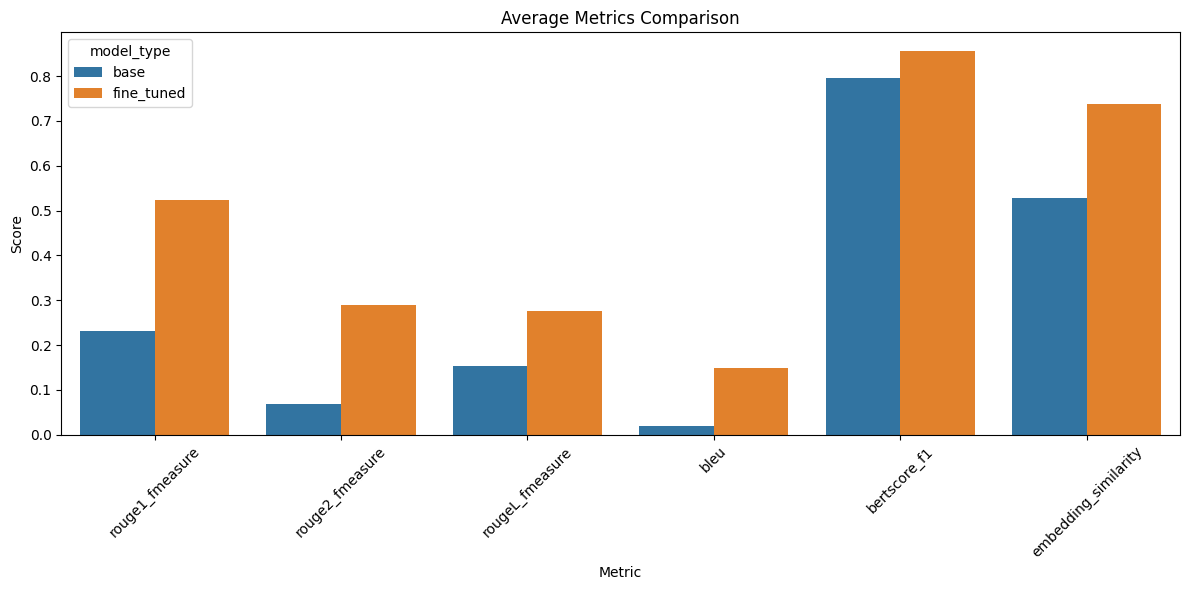

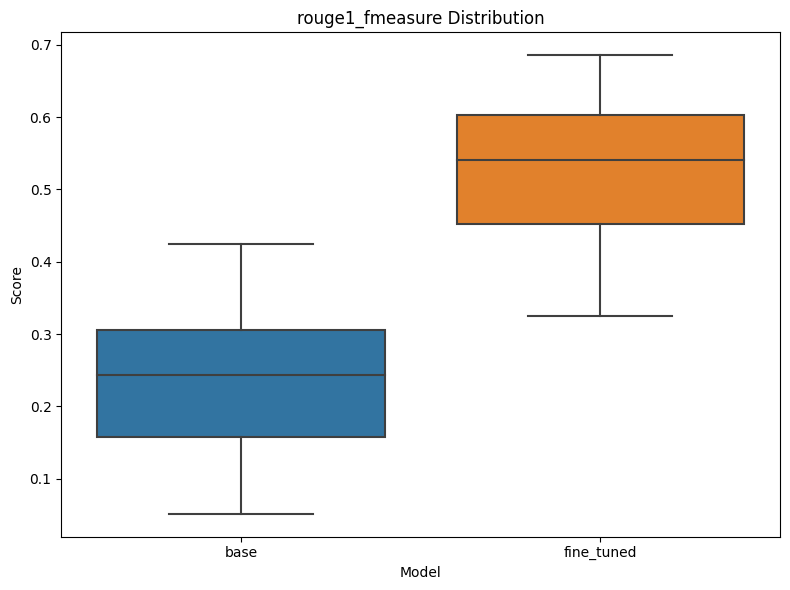

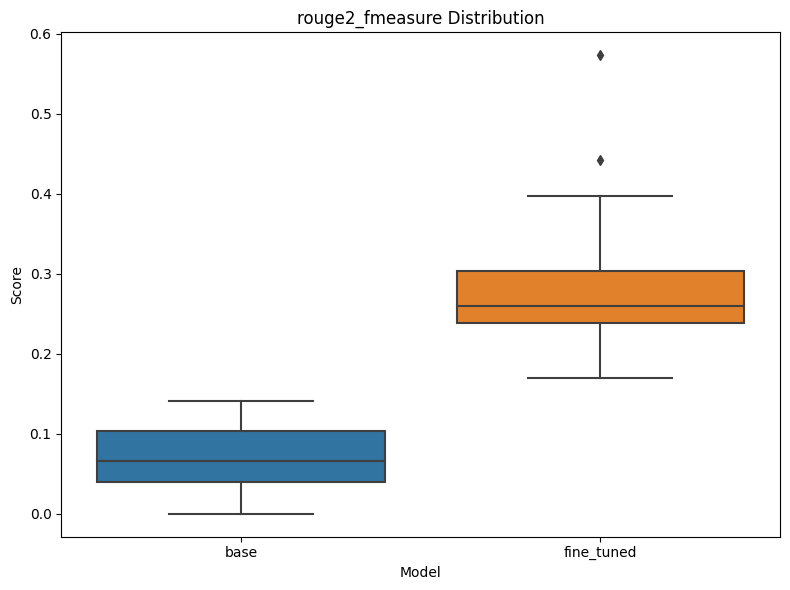

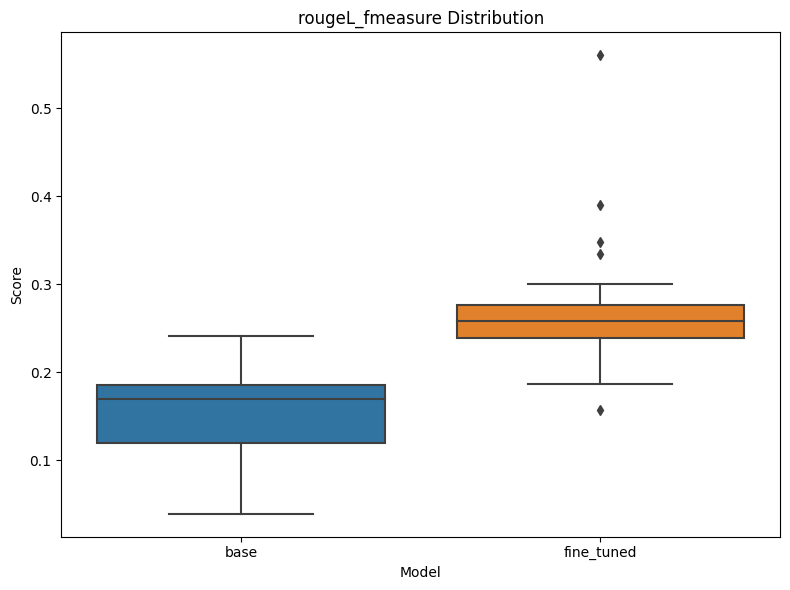

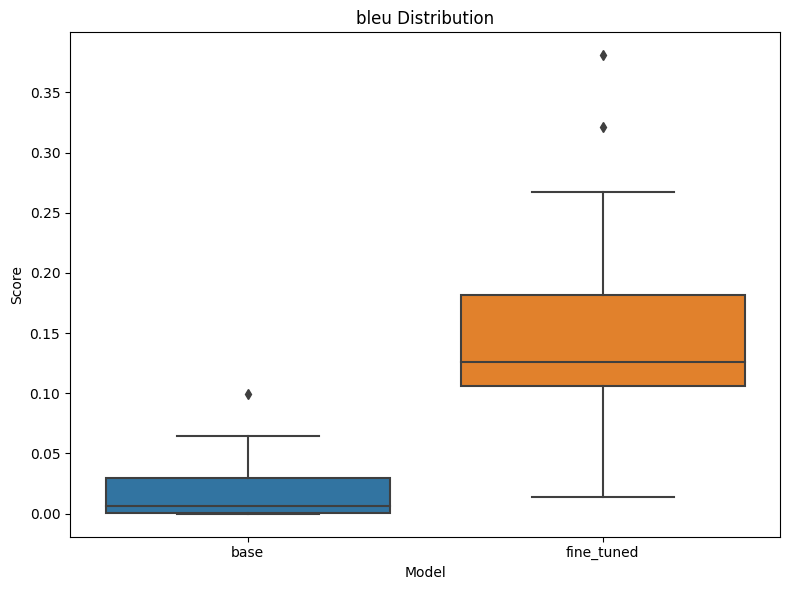

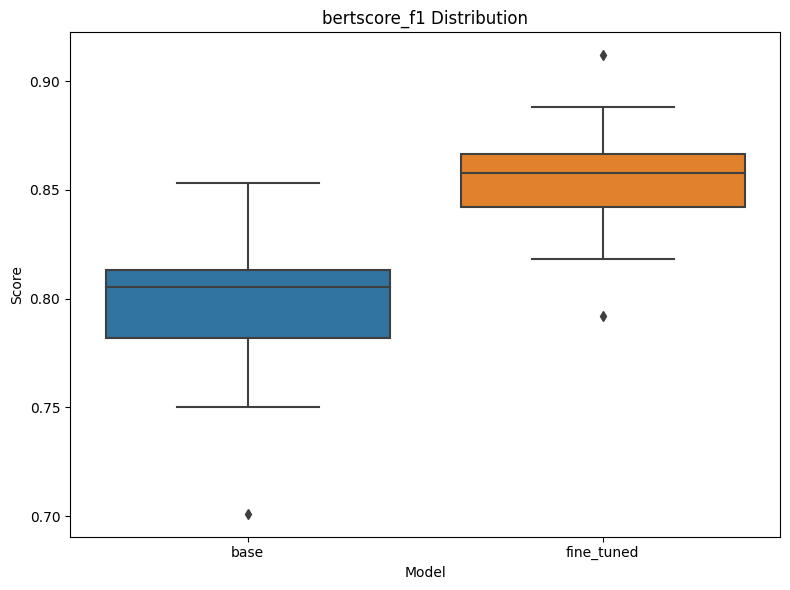

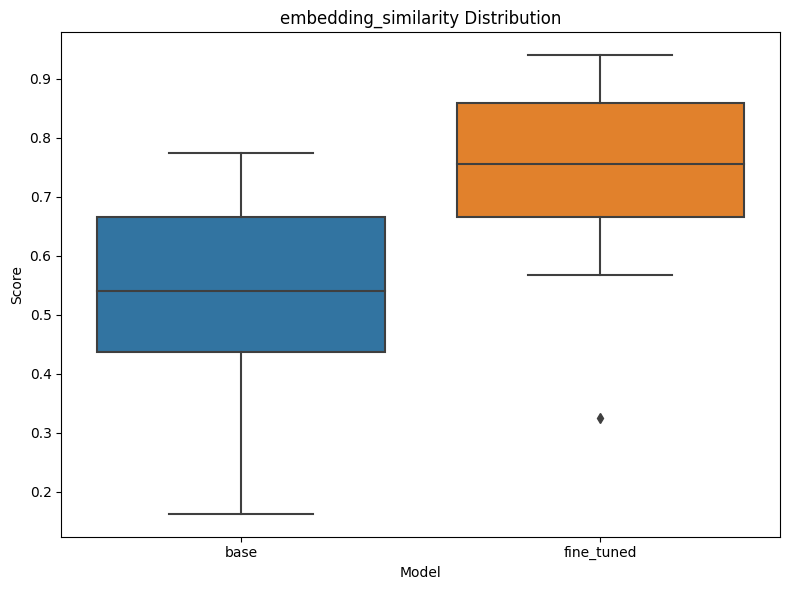

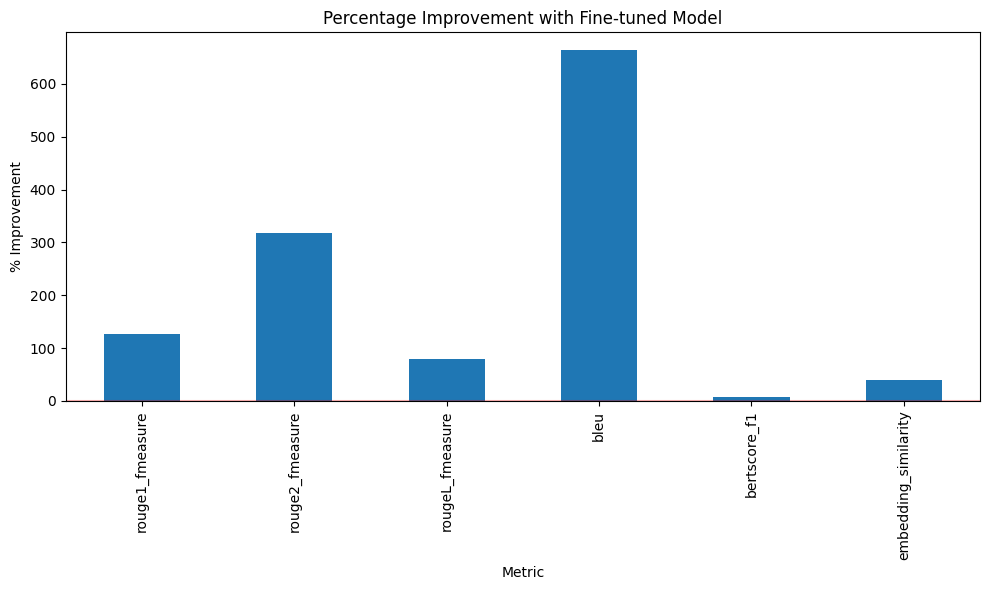

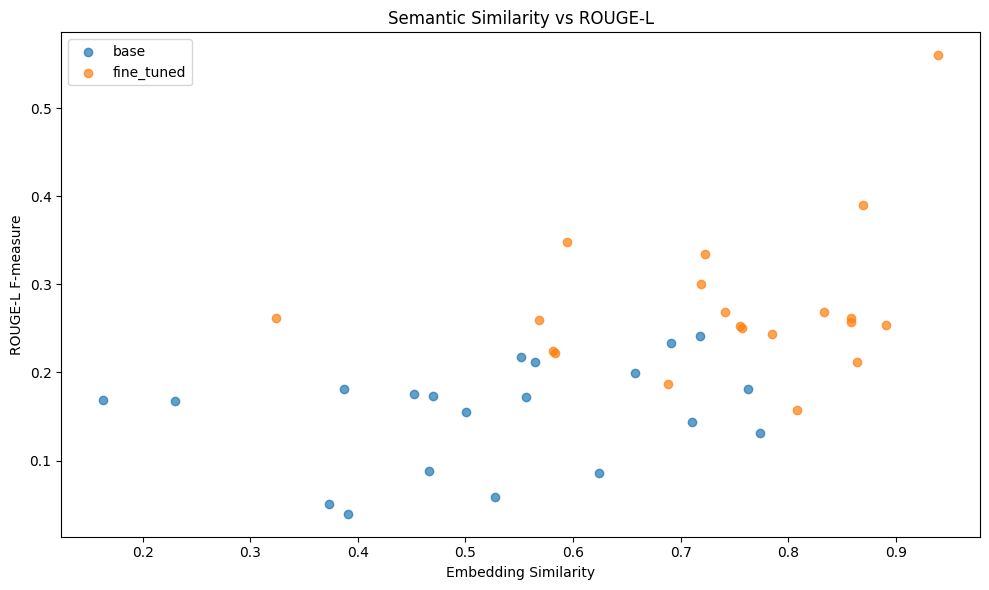

In [11]:
import os
import gc
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from peft import PeftModel
from tqdm import tqdm
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from evaluate import load
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import torch.nn.functional as F

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths and parameters
BASE_MODEL_PATH = '/kaggle/input/led-model/LED/IN_model'
LORA_MODEL_PATH = "/kaggle/input/train-with-rl-2/legal-led-lora-output/final-model"
HF_BASE_MODEL = "nsi319/legal-led-base-16384"
MAX_INPUT_LENGTH = 4096
MAX_OUTPUT_LENGTH = 1024
EVALUATION_OUTPUT_DIR = "./evaluation_results"

# Create output directory
os.makedirs(EVALUATION_OUTPUT_DIR, exist_ok=True)
os.makedirs(f"{EVALUATION_OUTPUT_DIR}/sample_summaries", exist_ok=True)
os.makedirs(f"{EVALUATION_OUTPUT_DIR}/visualizations", exist_ok=True)

# Model Loading Functions
def load_fine_tuned_model():
    print("Loading fine-tuned model...")
    tokenizer = AutoTokenizer.from_pretrained('nsi319/legal-led-base-16384')
    base_model = AutoModelForSeq2SeqLM.from_pretrained(
        BASE_MODEL_PATH,
        torch_dtype=torch.float16
    )
    model = PeftModel.from_pretrained(base_model, LORA_MODEL_PATH)
    model = model.merge_and_unload()
    model = model.to(device)
    model.eval()
    gc.collect()
    torch.cuda.empty_cache()
    return model, tokenizer

def load_base_model():
    print("Loading base model...")
    tokenizer = AutoTokenizer.from_pretrained(HF_BASE_MODEL)
    model = AutoModelForSeq2SeqLM.from_pretrained(
        HF_BASE_MODEL,
        torch_dtype=torch.float16
    )
    model = model.to(device)
    model.eval()
    gc.collect()
    torch.cuda.empty_cache()
    return model, tokenizer

def calculate_embedding_metrics(reference, prediction):
    # Load model for embeddings
    model = SentenceTransformer('all-MiniLM-L6-v2').to(device)
    
    # Get embeddings
    ref_embedding = model.encode([reference], convert_to_tensor=True)
    pred_embedding = model.encode([prediction], convert_to_tensor=True)
    
    # Cosine similarity
    cosine_sim = cosine_similarity(
        ref_embedding.cpu().numpy(), 
        pred_embedding.cpu().numpy()
    )[0][0]
    
    return {
        'embedding_similarity': float(cosine_sim)
    }

# Load test dataset
def load_test_data(num_samples=100):
    # Use your test_df instead of loading from HuggingFace
    test_sample = test_df.sample(n=min(num_samples, len(test_df)), random_state=42)
    return test_sample

# Inference function
def generate_summary(model, tokenizer, text):
    inputs = tokenizer(text, max_length=MAX_INPUT_LENGTH, truncation=True, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_length=MAX_OUTPUT_LENGTH,
            num_beams=4,
            early_stopping=True
        )
    
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# Metric calculation
def calculate_metrics(reference, prediction):
    # Add checks for empty strings
    if not prediction.strip() or not reference.strip():
        # Handle empty summary case
        return {metric: 0.0 for metric in ['rouge1_precision', 'rouge1_recall', 'rouge1_fmeasure', 
                                           'rouge2_fmeasure', 'rougeL_fmeasure', 'bleu', 'bertscore_f1']}
    # ROUGE scores
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, prediction)
    
    # BLEU score
    smoothie = SmoothingFunction().method1
    reference_tokens = reference.split()
    prediction_tokens = prediction.split()
    bleu_score = sentence_bleu([reference_tokens], prediction_tokens, smoothing_function=smoothie)
    
    # BERTScore
    bertscore = load("bertscore")
    bert_results = bertscore.compute(predictions=[prediction], references=[reference], lang="en")
    # Add embedding metrics
    embedding_metrics = calculate_embedding_metrics(reference, prediction)
    return {
        'rouge1_precision': scores['rouge1'].precision,
        'rouge1_recall': scores['rouge1'].recall,
        'rouge1_fmeasure': scores['rouge1'].fmeasure,
        'rouge2_fmeasure': scores['rouge2'].fmeasure,
        'rougeL_fmeasure': scores['rougeL'].fmeasure,
        'bleu': bleu_score,
        'bertscore_f1': bert_results['f1'][0],
        **embedding_metrics
    }

# Main evaluation function
def evaluate_models(num_samples=30):
    # Load models
    fine_tuned_model, ft_tokenizer = load_fine_tuned_model()
    base_model, base_tokenizer = load_base_model()
    
    # Load test data
    test_data = load_test_data(num_samples)
    
    results = []
    
    for i, example in enumerate(tqdm(test_data.iterrows())):
        _, row = example
        document = row['Text']
        reference = row['Summary']
        
        # Generate summaries
        base_summary = generate_summary(base_model, base_tokenizer, document)
        fine_tuned_summary = generate_summary(fine_tuned_model, ft_tokenizer, document)
        
        # Calculate metrics
        base_metrics = calculate_metrics(reference, base_summary)
        ft_metrics = calculate_metrics(reference, fine_tuned_summary)
        
        # Save sample summaries
        if i < 5:  # Save first 5 examples for manual inspection
            with open(f"{EVALUATION_OUTPUT_DIR}/sample_summaries/example_{i}.txt", "w") as f:
                f.write(f"DOCUMENT:\n{document[:500]}...\n\n")
                f.write(f"REFERENCE SUMMARY:\n{reference}\n\n")
                f.write(f"BASE MODEL SUMMARY:\n{base_summary}\n\n")
                f.write(f"FINE-TUNED MODEL SUMMARY:\n{fine_tuned_summary}\n")
        
        # Store results
        results.append({
            "example_id": i,
            "model_type": "base",
            **base_metrics
        })
        results.append({
            "example_id": i,
            "model_type": "fine_tuned",
            **ft_metrics
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Save results
    results_df.to_csv(f"{EVALUATION_OUTPUT_DIR}/metrics_comparison.csv", index=False)
    
    # Create visualizations
    create_visualizations(results_df)
    
    return results_df

# Visualization functions
def create_visualizations(results_df):
    # Update metrics list
    metrics = ['rouge1_fmeasure', 'rouge2_fmeasure', 'rougeL_fmeasure', 'bleu', 'bertscore_f1', 'embedding_similarity']
    
    # 1. Bar chart comparing average metrics
    plt.figure(figsize=(12, 6))
    
    avg_metrics = results_df.groupby('model_type')[metrics].mean().reset_index()
    avg_metrics_melted = pd.melt(avg_metrics, id_vars=['model_type'], value_vars=metrics)
    
    sns.barplot(x='variable', y='value', hue='model_type', data=avg_metrics_melted)
    plt.title('Average Metrics Comparison')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{EVALUATION_OUTPUT_DIR}/visualizations/avg_metrics_comparison.png")
    
    # 2. Box plots for each metric
    for metric in metrics:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='model_type', y=metric, data=results_df)
        plt.title(f'{metric} Distribution')
        plt.xlabel('Model')
        plt.ylabel('Score')
        plt.tight_layout()
        plt.savefig(f"{EVALUATION_OUTPUT_DIR}/visualizations/{metric}_boxplot.png")
    
    # 3. Calculate and visualize improvement percentage
    base_avg = results_df[results_df['model_type'] == 'base'][metrics].mean()
    ft_avg = results_df[results_df['model_type'] == 'fine_tuned'][metrics].mean()
    
    improvement = ((ft_avg - base_avg) / base_avg) * 100
    
    plt.figure(figsize=(10, 6))
    improvement.plot(kind='bar')
    plt.title('Percentage Improvement with Fine-tuned Model')
    plt.xlabel('Metric')
    plt.ylabel('% Improvement')
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{EVALUATION_OUTPUT_DIR}/visualizations/improvement_percentage.png")

    plt.figure(figsize=(10, 6))
    for model_type in ['base', 'fine_tuned']:
        model_data = results_df[results_df['model_type'] == model_type]
        plt.scatter(model_data['embedding_similarity'], model_data['rougeL_fmeasure'], alpha=0.7, label=model_type)
    
    plt.title('Semantic Similarity vs ROUGE-L')
    plt.xlabel('Embedding Similarity')
    plt.ylabel('ROUGE-L F-measure')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{EVALUATION_OUTPUT_DIR}/visualizations/semantic_vs_rouge.png")
# Run evaluation
if __name__ == "__main__":
    results = evaluate_models(num_samples=20)  # Adjust sample size as needed
    
    # Display summary
    base_avg = results[results['model_type'] == 'base'][['rouge1_fmeasure', 'rouge2_fmeasure', 'rougeL_fmeasure', 'bleu', 'bertscore_f1']].mean()
    ft_avg = results[results['model_type'] == 'fine_tuned'][['rouge1_fmeasure', 'rouge2_fmeasure', 'rougeL_fmeasure', 'bleu', 'bertscore_f1']].mean()
    
    print("\nRESULTS SUMMARY:")
    print(f"Base Model Metrics:\n{base_avg}")
    print(f"\nFine-tuned Model Metrics:\n{ft_avg}")
    
    improvement = ((ft_avg - base_avg) / base_avg) * 100
    print(f"\nPercentage Improvement:\n{improvement}")
    print(f"\nDetailed results saved to {EVALUATION_OUTPUT_DIR}")